In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from ActiveLearning import GAL, GNN
import numpy.linalg as nla
import pickle
import networkx as nx
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans


In [2]:
def sim_mat(X):
	X = X / nla.norm(X, axis=-1).reshape(-1, 1)
	cos_sim_mat = (X @ X.T) - np.eye(X.shape[0])
	cos_sim_mat = np.absolute(cos_sim_mat)
	return cos_sim_mat

def construct_graph(X, thresh=.8):
	cos_sim_mat = sim_mat(X)
	edges = np.vstack(np.where(cos_sim_mat > thresh))
	return edges

def GNN_embed(X, edges, gnn):
	return gnn(X, edges)
	

In [3]:
with open('dataset_q1.pkl', 'rb') as f:
	dataset = pickle.load(f)


In [4]:
K = 1000

In [5]:
dataset
train_samples, train_labels = dataset['train_samples'], dataset['train_labels']
test_samples, test_labels = dataset['test_samples'], dataset['test_labels']
available_pool_samples, available_pool_labels = dataset['available_pool_samples'][:K], dataset['available_pool_labels'][:K]

In [6]:
kmeans = KMeans(n_clusters=4)


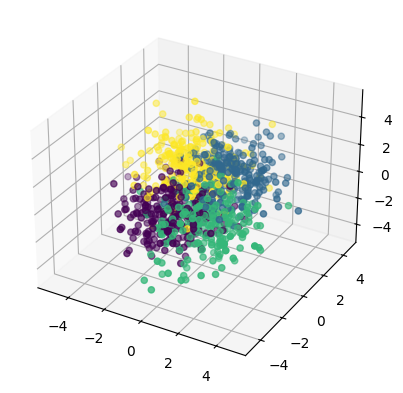

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(*available_pool_samples.T, c=available_pool_labels)


In [8]:
kmeans = kmeans.fit(available_pool_samples)

In [9]:
kmeans.transform(available_pool_samples).min(axis=-1, keepdims=True)

array([[1.31303759],
       [2.89163443],
       [1.22239884],
       [1.5140368 ],
       [1.36406673],
       [1.14365479],
       [1.28489384],
       [1.29061928],
       [1.00092877],
       [2.04104776],
       [2.05837956],
       [1.63592165],
       [1.94934811],
       [1.86278701],
       [1.99332597],
       [2.49394379],
       [1.31495126],
       [2.11521505],
       [2.21814134],
       [3.89475892],
       [1.49184363],
       [1.44093333],
       [1.12950556],
       [1.53724859],
       [1.61377837],
       [1.91991398],
       [0.6177756 ],
       [1.13609307],
       [1.30937279],
       [1.15543884],
       [0.62237609],
       [1.26873793],
       [2.75509934],
       [0.86999307],
       [1.67092674],
       [1.76944434],
       [1.61534161],
       [1.67958185],
       [1.38309192],
       [1.84960563],
       [2.6511165 ],
       [1.113981  ],
       [1.38541646],
       [2.15552256],
       [0.89859339],
       [1.72000079],
       [1.7574506 ],
       [1.169

In [10]:
iterations = 40
budget_per_iter = 50
train_limit = 2010
gal = GAL(
	dataset,
	None,
	iterations,
	budget_per_iter,
	train_limit,
	.9,
	None,
	LogisticRegression,
	GNN
)
# gnn = GNN(3, 4, 5)

In [11]:
model, gnn_model = gal._train_model()

In [12]:
A = gal.sim_mat(gal.train_samples)
G = gal.construct_graph(A, gal.available_pool_samples)

In [13]:
# len(gal.entropy(gal.available_pool_samples, model)) == len(gal.available_pool_samples)
# gal.density_score(gal.available_pool_samples)
# gal.entropy(gal.available_pool_samples, model)
# nx.pagerank(G)

In [14]:
import numpy as np


# for n in range(1, 11):
# 	coef_vector = np.random.beta(1, [1/n, 1/n, n], size=(3))
# 	print(coef_vector)

# np.random.beta(1, 300)


In [15]:
# U_idx = gal.select_points(G, model)

In [16]:
A = gal.sim_mat(available_pool_samples)
E = gal.construct_graph(A, available_pool_samples)
# list(zip(E))
# list(zip(*E))

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_samples, train_labels)

# E[0].nodes

LogisticRegression()

In [18]:
def entropy(X):
	if not isinstance(X, torch.Tensor):
		X = torch.Tensor(X)
	ENT = (X * torch.log2(X)).sum(dim=-1)
	return ((ENT - ENT.min()) / (ENT.max() - ENT.min())).numpy()

In [19]:
entropy(model.predict_proba(available_pool_samples))

array([0.04642516, 0.37286577, 0.3060567 , 0.149439  , 0.2768623 ,
       0.2877411 , 0.27066168, 0.2609862 , 0.26143497, 0.3999269 ,
       0.8229566 , 0.13180308, 0.31680408, 0.03157903, 0.24310224,
       0.23427477, 0.02193858, 0.39279574, 0.05355956, 0.4080701 ,
       0.4523601 , 0.32678267, 0.41019943, 0.12809837, 0.32095656,
       0.1153889 , 0.18065731, 0.86629826, 0.8325504 , 0.2963813 ,
       0.28701326, 0.5066386 , 0.8814457 , 0.28614077, 0.1848447 ,
       0.1668075 , 0.37128034, 0.35937902, 0.4830746 , 0.02497692,
       0.30425778, 0.7783593 , 0.3304633 , 0.4861089 , 0.7083938 ,
       0.07810122, 0.3624146 , 0.18084446, 0.05977861, 0.51735985,
       0.33122888, 0.09114411, 0.5012468 , 0.2753428 , 0.3986047 ,
       0.39128307, 0.3753017 , 0.46001086, 0.64188933, 0.10439354,
       0.03002103, 0.11674644, 0.3515546 , 0.25493252, 0.20336021,
       0.17505434, 0.31426933, 0.30638188, 0.48623016, 0.45687276,
       0.8667601 , 0.64909035, 0.17938116, 0.06149903, 0.21538

In [20]:
ENT_DICT = dict(zip(range(len(available_pool_samples)), entropy(model.predict_proba(available_pool_samples))))
PR_DICT = nx.pagerank(E[0])

In [21]:
s = {}
for k in ENT_DICT.keys():
	s[k] = ENT_DICT[k] + PR_DICT[k] 
s

{0: 0.04754985494154423,
 1: 0.37371573361010746,
 2: 0.30709676247502576,
 3: 0.15028177151566136,
 4: 0.2778443429537279,
 5: 0.288790747134009,
 6: 0.27168481362977803,
 7: 0.26209378430168556,
 8: 0.26266929783447035,
 9: 0.40096287903460354,
 10: 0.8237361561114299,
 11: 0.13292961976270717,
 12: 0.31777142961174193,
 13: 0.03240130966892407,
 14: 0.24429514791710724,
 15: 0.23506620148766513,
 16: 0.02279867703065475,
 17: 0.3938867640473771,
 18: 0.05435995110954668,
 19: 0.40906200382327423,
 20: 0.45324489498901743,
 21: 0.32765836147590016,
 22: 0.41132635000593815,
 23: 0.1290705617234605,
 24: 0.32187787553132857,
 25: 0.11627363768936103,
 26: 0.18173387588890547,
 27: 0.8673641806892237,
 28: 0.8337418927713011,
 29: 0.29745531116339946,
 30: 0.28819364324425256,
 31: 0.5074873843578694,
 32: 0.8826896144679168,
 33: 0.2872911857305941,
 34: 0.1857581516430568,
 35: 0.16759562868110903,
 36: 0.37251154592876523,
 37: 0.36040865926738314,
 38: 0.4842663892455139,
 39: 0.02

In [22]:
nx.pagerank(E[0])

{0: 0.0011246986462446948,
 1: 0.0008499673232574699,
 2: 0.0010400543775678783,
 3: 0.0008427644718228455,
 4: 0.0009820494719011137,
 5: 0.0010496523063569952,
 6: 0.001023131739290346,
 7: 0.0011075753859750982,
 8: 0.001234325548245991,
 9: 0.001035978170956082,
 10: 0.0007795344645488494,
 11: 0.0011265393231396094,
 12: 0.0009673484101885893,
 13: 0.0008222808538930208,
 14: 0.0011929103349005126,
 15: 0.0007914266978549542,
 16: 0.0008600997363050799,
 17: 0.0010910224893021388,
 18: 0.0008003907808246812,
 19: 0.0009919163904128982,
 20: 0.0008848013954199975,
 21: 0.0008756878785643528,
 22: 0.001126916440798356,
 23: 0.0009721930787461176,
 24: 0.0009213175422080984,
 25: 0.0008847376477808266,
 26: 0.0010765636149262766,
 27: 0.0010659223846277701,
 28: 0.0011914863153074337,
 29: 0.0010740164360740062,
 30: 0.0011803807339528522,
 31: 0.0008487978367207947,
 32: 0.001243908577261334,
 33: 0.0011504160105165976,
 34: 0.0009134491608333,
 35: 0.0007881261729455673,
 36: 0.001

In [24]:
D_samples = np.concatenate([train_samples, available_pool_samples], axis=0)
D_labels = np.concatenate([train_labels, available_pool_labels], axis=0)
gnn_labeled_idx = list(range(len(train_samples)))

A = gal.sim_metric(D_samples)
D_gnn, V_gnn, E_gnn = gal.construct_graph(A, D_samples)

D_samples_torch = torch.Tensor(D_samples)
E_gnn_torch = torch.tensor(E_gnn)
D_embed = gnn(D_samples_torch, E_gnn_torch)
# D_embed


NameError: name 'gnn' is not defined

In [ ]:
x = torch.rand(2, 3)
x_emb = torch.rand(2, 5)
print(x, x_emb)
torch.cat([x, x_emb], dim=1)

In [78]:
V = available_pool_samples
A = gal.sim_mat(V)

G, E = gal.construct_graph(A, V)

V = torch.Tensor(V)
E = torch.tensor(E)

U_idx = gal.select_points(G)
gnn_labeled_idx.extend([e + len(train_samples) for e in U_idx])

gal.label_update(U_idx)
gnn.train(gnn_labeled_idx)
model.train()



In [82]:
gnn_labeled_idx.extend([e + len(train_samples) for e in U_idx])

In [74]:
# gnn_labeled_idx

In [ ]:

E

In [ ]:
gnn(V, E)[U_idx]

In [ ]:

nx.draw(G, with_labels=True)
U_idx = gal.select_points(G)
# V_emb = gnn(V, E)[U_idx]
gal.label_update(U_idx)
# gal._train_model()


# R = gal.unceartinty_score(G)
# R


In [ ]:
MAT = [
	[0, 1, 0],
	[1, 0, 0],
	[0, -2, 0]
]

pairwise_distances(MAT, MAT)
# sim_mat(MAT)

In [ ]:
pairwise_distances(available_pool_samples[:100], available_pool_samples[:100], metric='cosine')
# A

In [ ]:
sim_mat(train_samples).round(1)

In [ ]:
# construct_graph(train_samples)
# train_samples
G = nx.Graph()
for i, e in enumerate(gal.train_samples):
	G.add_node(i, label=','.join(map(lambda x: str(round(x, 2)), e)))

edges = sim_mat(train_samples)
edges = np.vstack(np.where(edges > .8))

for e in edges.T:
	G.add_edge(*e)

nx.draw(G, with_labels=True)

# nx.degree_centrality(G)
R = nx.pagerank(G)
# print(R)
D = sorted(R, key=lambda x: R[x], reverse=True)[:5]
R, D

In [4]:
model = classifier(2, 3)

In [ ]:
hasattr(model, 'forward')

In [ ]:
# dir(model).__contains__('forward')

In [ ]:
callable(model.register_backward_hook)

In [2]:
model = classifier(2, 3)

In [3]:
cluster_means = [(7, 3), (1, 1), (6, 10)]
ppc = 30
X = np.vstack([np.random.normal(c, np.random.random(), size=(ppc, 2)) for c in cluster_means])
X = torch.tensor(X).type(torch.float)
Y = torch.cat([(torch.ones(ppc) * i) for i in range(len(cluster_means))]).reshape(-1, 1).type(torch.long)
# print(X, Y)


In [ ]:
Y.reshape(-1)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1))

In [ ]:
o = model(X)
o

In [7]:
lr = .001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
EPOCHS = 5
model.train()

for epoch in range(EPOCHS):

	total_loss = 0
	for x, y in zip(X, Y):
	
		o = model(x.unsqueeze(dim=0))

		loss = criterion(o, y)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		total_loss += loss.item()

	print(f'[{epoch + 1} / {EPOCHS}]: loss - {total_loss / len(X)}')




In [ ]:
model.predict(X[61])

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X).argmax(dim=-1))

In [ ]:
import pickle
from collections import defaultdict
from ActiveLearning import ActiveLearningPipeline, generate_plot

with open('dataset_q1.pkl', 'rb') as f:
	dataset = pickle.load(f)

iterations = 40
budget_per_iter = 50
train_limit = 2010
selection_criteria = ['random', 'custom']
accuracy_scores_dict = defaultdict(list)
for criterion in selection_criteria:
	AL_class = ActiveLearningPipeline(dataset=dataset,
									selection_criterion=criterion,
									iterations=iterations,
									budget_per_iter=budget_per_iter,
									train_limit=train_limit)
	accuracy_scores_dict[criterion] = AL_class.run_pipeline()
generate_plot(accuracy_scores_dict)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy.linalg as nla

pca = PCA(n_components=2)
X = pca.fit_transform(dataset['available_pool_samples'])
Y = dataset['available_pool_labels']

plt.scatter(X[:100, 0], X[:100, 1], c=Y[:100])
plt.plot()


In [ ]:
A = dataset['available_pool_samples'][:100]
A = A / nla.norm(A, axis=-1).reshape(-1, 1)
A

In [59]:
# cos_sim_mat = D @ D.T
cos_sim_mat = (A @ A.T) - np.eye(A.shape[0])

In [54]:
sorted_sim = np.sort(cos_sim_mat, axis=1)[:, -2::-1]

In [61]:
thresh = .8
edges = np.where(cos_sim_mat > thresh)